In [2]:
import warnings # Used to ignore warnings
warnings.filterwarnings('ignore')
import xgboost as xg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# It will make plot output appear in the notebook as well as save in the notebook, hence next time when you open, you would be able to see the plot, without re running
plt.rc("font", size=14)
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # For pre-prcoessing
from sklearn.preprocessing import LabelEncoder # Just in case the output variable is in string form or Used to convert the categorical variable into numeric
lb = LabelEncoder() # Also if independent variables are in string format, encode those ones as well
from sklearn.model_selection import train_test_split # For spliiting into test and train
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import tree # For decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_boston
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from yellowbrick.cluster import SilhouetteVisualizer
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\MBA STUDY MATERIAL\TRIMESTER -4\ADVANCED MACHINE LEARNING\AML Project\online_shoppers_intention.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.shape

(12330, 18)

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


# CLUSTERING

In [9]:
def find_clusters(data, start=1, end=11):
    """
    data: array like
    """
    inertias = []

    for i in range(start,end):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)


    plt.plot(np.arange(start,end), np.array(inertias), color='orange', marker='o')
    plt.xlabel('No. of clusters')
    plt.ylabel('Inertia')
    plt.title("Elbow Curve", fontsize=16)
    plt.show()

In [10]:
def draw_optimal_clusters(data, n_clusters=2, xlabel=None, ylabel=None, title=None):
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    
    y_means = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    plt.scatter(X[y_means==0, 0], X[y_means==0, 1], color='lightblue', label='Uninterested Customers')
    plt.scatter(X[y_means==1, 0], X[y_means==1, 1], color='orange', label='Interested Customers')
    plt.scatter(centers[:,0], centers[:,1], s=100, label='Centers')

    plt.legend()

    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# INTERNATIONAL DURATION V/S DURATION RATE

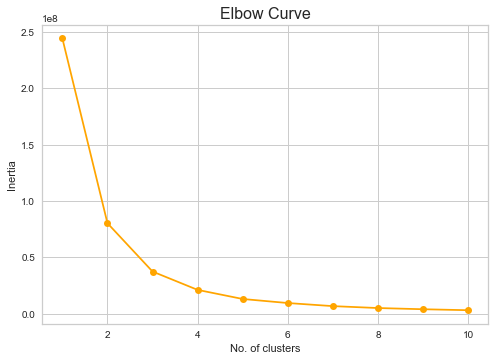

In [11]:
# Performing K-means Clustering for Informational Duration versus Bounce Rate

X = df.iloc[:, [3, 6]].values

find_clusters(X)

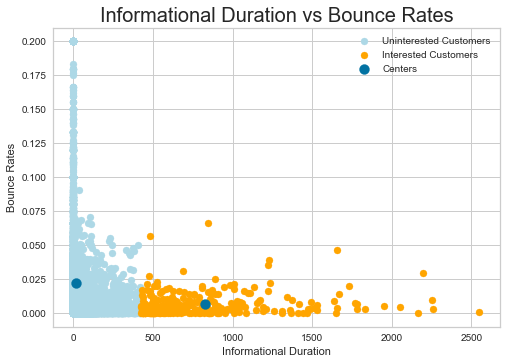

In [12]:
draw_optimal_clusters(X,n_clusters=2, xlabel="Informational Duration", 
                      ylabel="Bounce Rates", 
                      title="Informational Duration vs Bounce Rates")


# INTERNATIONAL DURATION V/S EXIT RATE

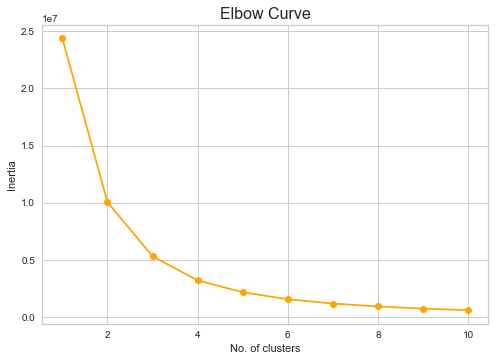

In [13]:
# K-means Clustering for Informational Duration versus Exit Rate

X = df.iloc[:, [4, 7]].values

find_clusters(X)

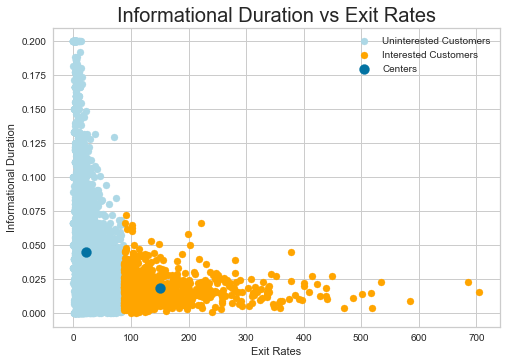

In [14]:
draw_optimal_clusters(X, n_clusters=2, xlabel='Exit Rates', 
                      ylabel='Informational Duration', 
                      title='Informational Duration vs Exit Rates')

# ADMINISTRATION V/S BOUNCE RATE

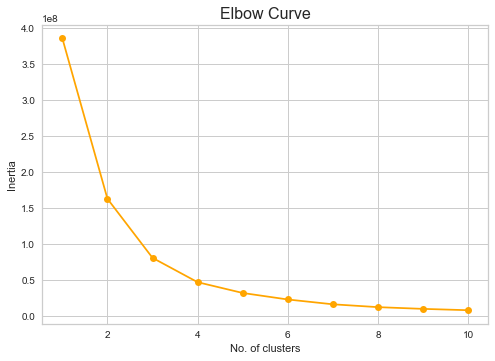

In [15]:
# K-means Clustering for Administrative Duration versus Bounce Rate

X = df.iloc[:, [1, 6]].values

find_clusters(X)

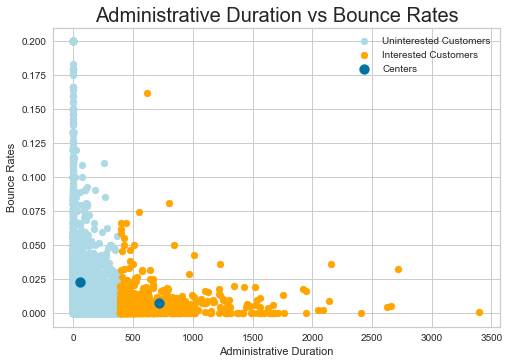

In [16]:
draw_optimal_clusters(X, n_clusters=2, xlabel="Administrative Duration", 
                      ylabel="Bounce Rates", 
                      title="Administrative Duration vs Bounce Rates")

# ADMINISTRATION DURATION V/S EXIT RATE

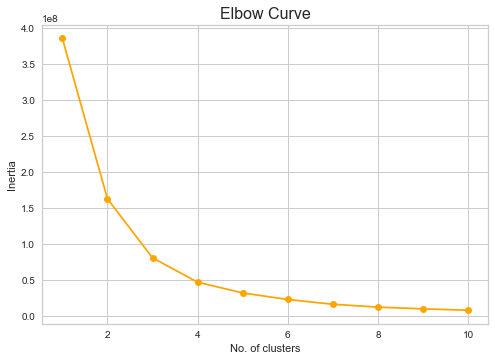

In [17]:
X = df.iloc[:, [1, 7]].values

find_clusters(X)

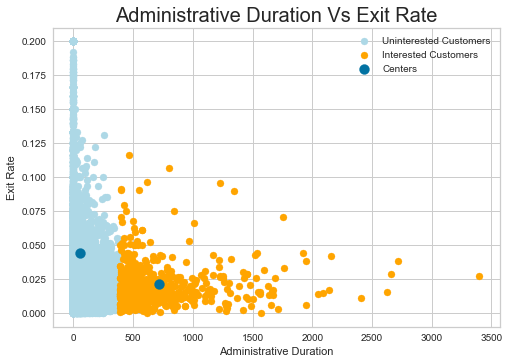

In [18]:
draw_optimal_clusters(X, n_clusters=2, xlabel="Administrative Duration", 
                      ylabel="Exit Rate", 
                      title="Administrative Duration Vs Exit Rate")

# Data Cleaning & Standardization

In [19]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

<AxesSubplot:>

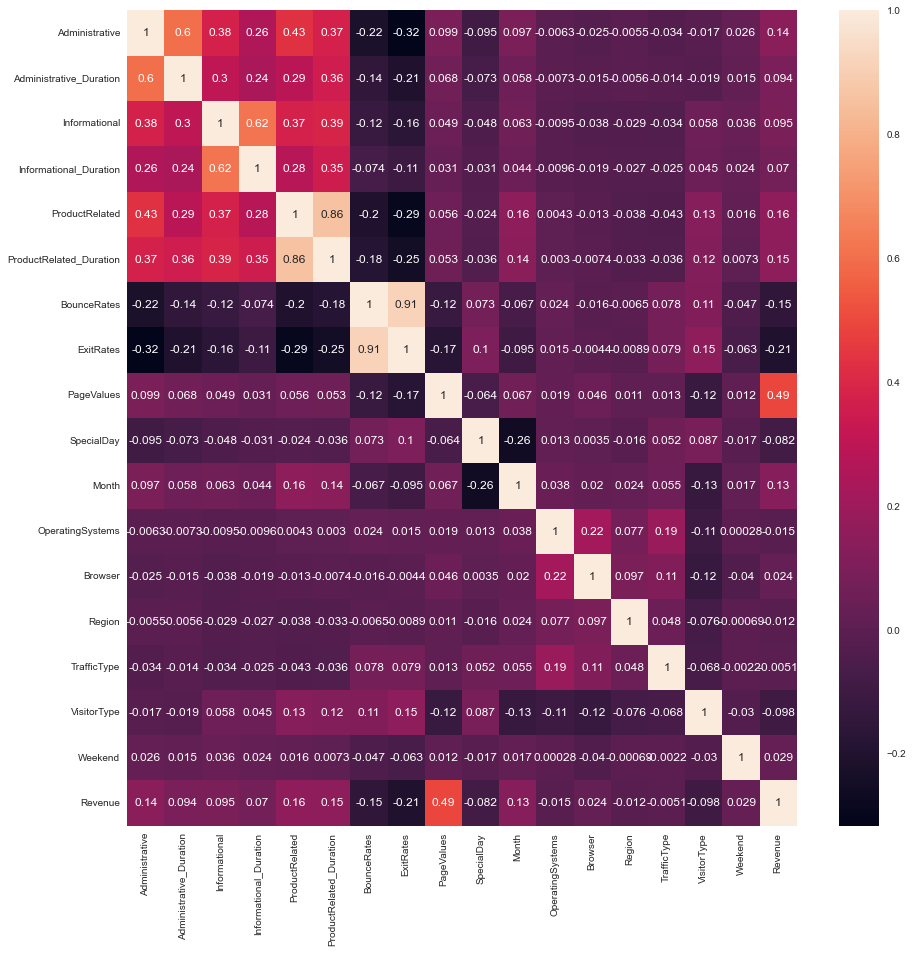

In [20]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [21]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(df.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(df.drop('Revenue', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) 
df_feat.head() 

StandardScaler()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


# K Nearest Neighbor 

In [22]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


KNeighborsClassifier(n_neighbors=17)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3110
           1       0.76      0.30      0.43       589

    accuracy                           0.87      3699
   macro avg       0.82      0.64      0.68      3699
weighted avg       0.86      0.87      0.85      3699



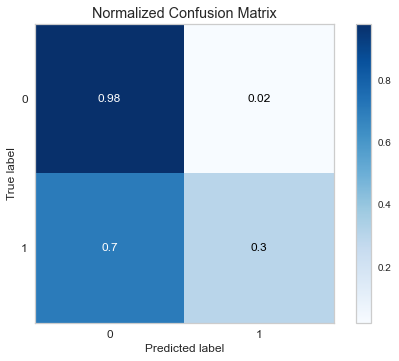

In [23]:
from sklearn.model_selection import train_test_split 
import scikitplot as skplt
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 17) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix 
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
print(classification_report(y_test, pred))

# ROC Curve

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.825


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

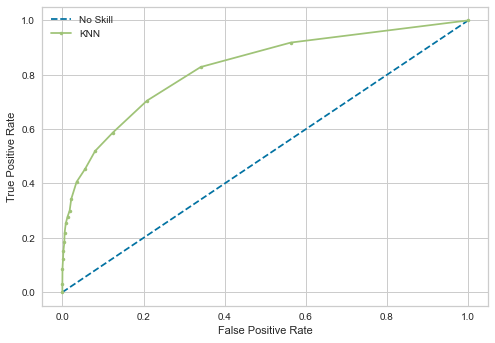

In [24]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot




ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
y_pred1 = (knn.predict_proba(X_test)[:,1] >= 0.15).astype(int) # set threshold as 0.3
recall_score(y_test, y_pred1)

0.7045840407470289

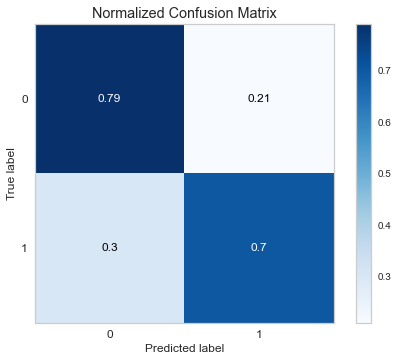

In [26]:
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,y_pred1, normalize=True)